In [132]:
%reload_ext autoreload

# Imports

%load_ext autoreload
%autoreload 2

%matplotlib inline
import sys
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import math

sys.path.append('../lib')
import utils
import preprocessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
# Load in data

PATH = "../data/"
df_raw = pd.read_csv(f'{PATH}churn.csv', low_memory=False, 
                     parse_dates=['canceldate', 'licence_registration_date', 'golive_date'])

In [134]:
utils.data_summary(df_raw)

Column                             Min      Max          Mean    Trimmed Mean    Median          Std        cv
-------------------------------  -----  -------  ------------  --------------  --------  -----------  --------
days_active                          0   2269     681.559          612.713        527     566.071     0.830554
nps                                  0     10       4.40672        nan              5       3.5339    0.801936
last_login_days                      0    417      26.1673         nan              0      59.6729    2.28044
last_login_concern                   0      1       0.287724       nan              0       0.452774  1.57364
golive_days                         -1   1643      67.6303          33.6183         4     142.993     2.11433
cases_total                          1    200       9.12935        nan              5      13.0971    1.43462
cases_open                           0     18       0.791624       nan              0       1.37527   1.73727
cases_

In [135]:
def decile_bins(df_raw, feature, bins=100):
    sb.set_style('whitegrid')
    fig, ax = plt.subplots()
    df_raw[feature].hist(ax=ax, bins=bins,figsize=[5,5])

    deciles = df_raw[feature].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
    #print(deciles)
    
    for pos in deciles:
        handle = plt.axvline(pos, color='r')
    
    ax.legend([handle],['deciles'],fontsize=14)

    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.tick_params(labelsize=14)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Occurance', fontsize=14)

def log_plot(columns):
    plt.figure(figsize=(20,15))

    for column in columns:
        plt.plot(np.sort(np.log(df_raw[column])), label=column)

    plt.legend(loc='lower right')
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2ce63320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c2e8ec9e8>]], dtype=object)

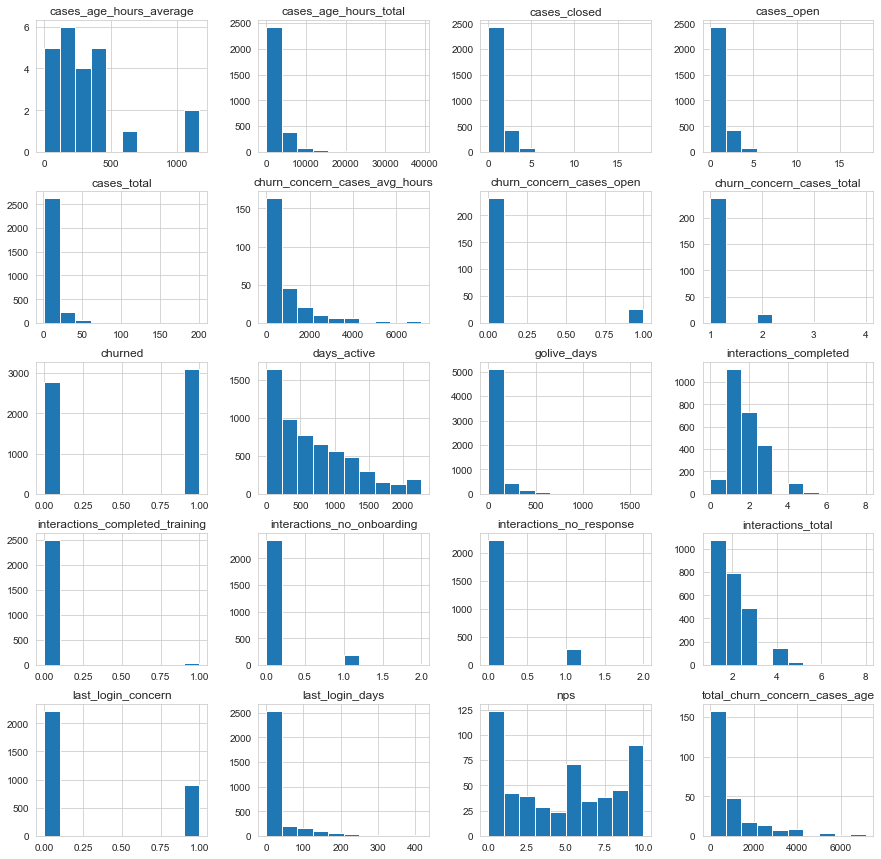

In [136]:
df_raw[df_raw.dtypes[(df_raw.dtypes=="float64")|(df_raw.dtypes=="int64")]
                        .index.values].hist(figsize=[15,15])

In [137]:
df_raw[df_raw.dtypes[(df_raw.dtypes=="float64")|(df_raw.dtypes=="int64")]
                        .index.values].columns

Index(['days_active', 'nps', 'last_login_days', 'last_login_concern',
       'golive_days', 'cases_total', 'cases_open', 'cases_closed',
       'cases_age_hours_total', 'cases_age_hours_average',
       'interactions_total', 'interactions_completed',
       'interactions_no_response', 'interactions_no_onboarding',
       'interactions_completed_training', 'churn_concern_cases_total',
       'churn_concern_cases_open', 'total_churn_concern_cases_age',
       'churn_concern_cases_avg_hours', 'churned'],
      dtype='object')

In [139]:
df_raw.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9], axis = 0).T

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
days_active,82.000000,154.000000,249.400000,377.000000,527.0,722.0,923.000000,1177.400000,1518.200000
nps,0.000000,0.000000,1.000000,3.000000,5.0,5.0,7.000000,8.000000,10.000000
last_login_days,0.000000,0.000000,0.000000,0.000000,0.0,0.0,6.000000,32.000000,102.000000
last_login_concern,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000
golive_days,-1.000000,-1.000000,-1.000000,-1.000000,4.0,24.0,53.000000,101.000000,199.000000
cases_total,1.000000,2.000000,3.000000,4.000000,5.0,6.0,9.000000,13.000000,22.000000
cases_open,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,1.000000,2.000000
cases_closed,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,1.000000,2.000000
cases_age_hours_total,43.000000,215.000000,489.000000,773.000000,1204.0,1732.0,2482.000000,3645.000000,5693.000000
cases_age_hours_average,72.701961,117.242857,156.105114,190.233333,249.2,285.6,366.766667,400.973077,593.739394


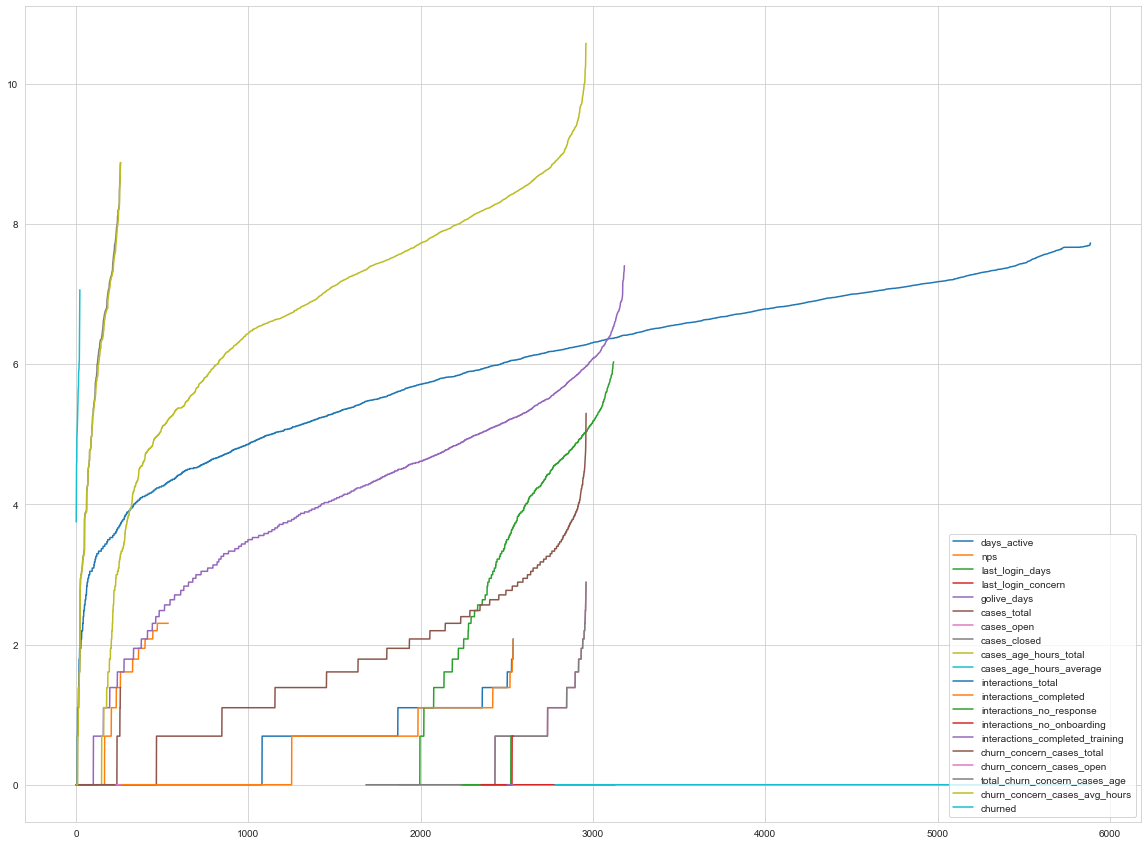

In [140]:
all_num_columns = df_raw[df_raw.dtypes[(df_raw.dtypes=="float64")|(df_raw.dtypes=="int64")].index.values].columns
log_plot(all_num_columns)

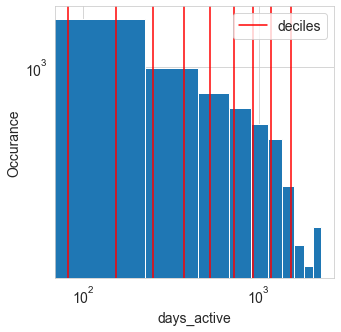

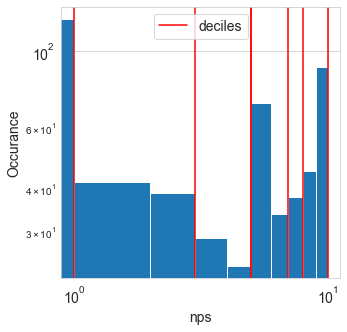

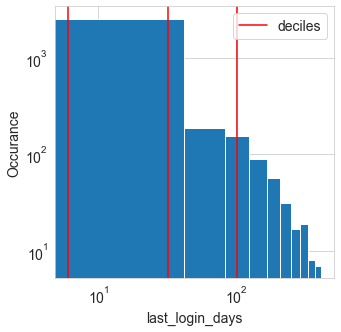

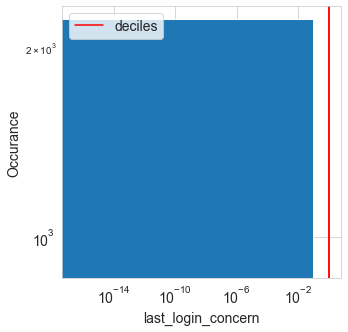

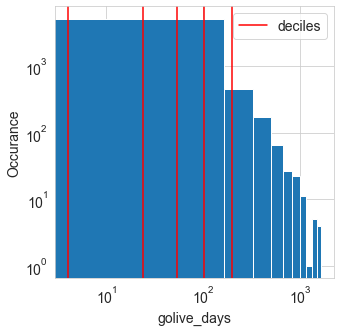

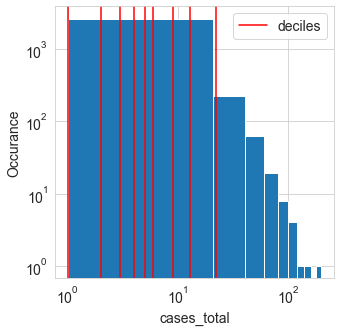

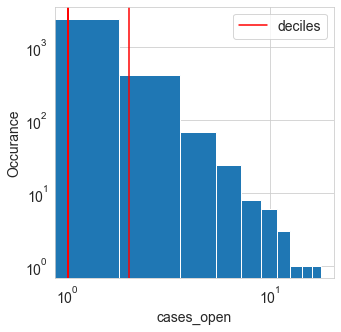

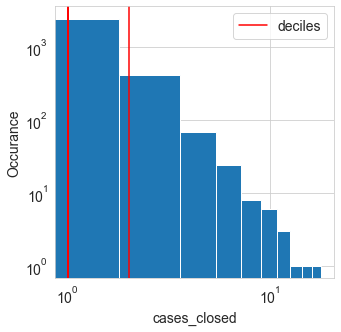

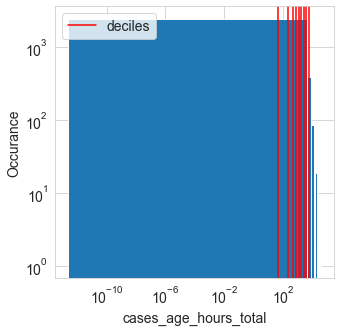

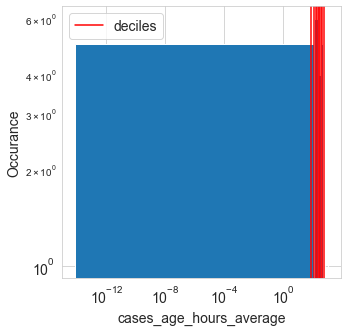

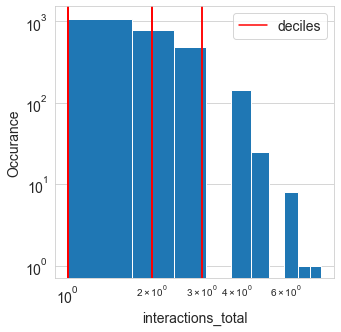

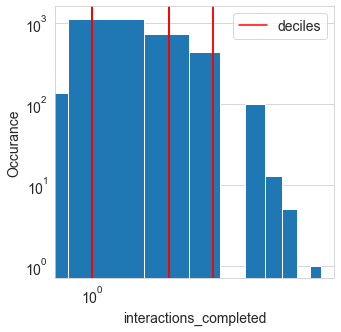

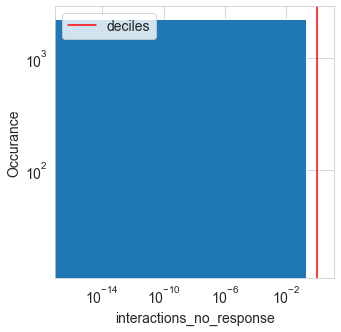

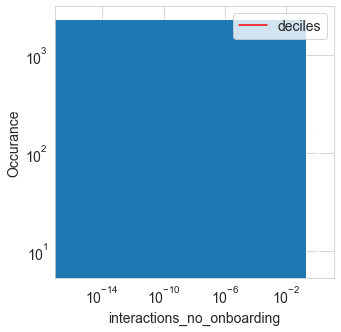

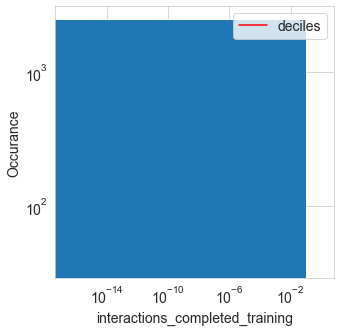

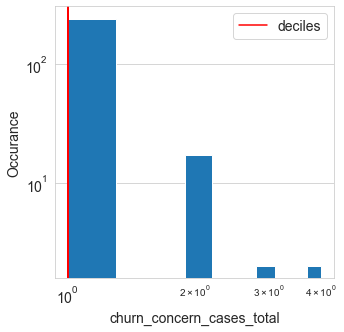

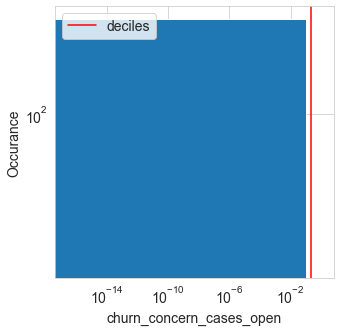

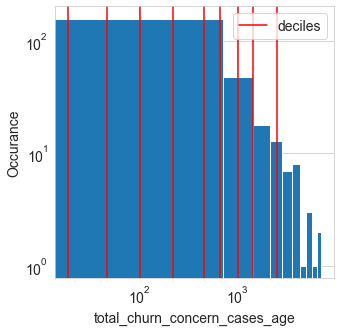

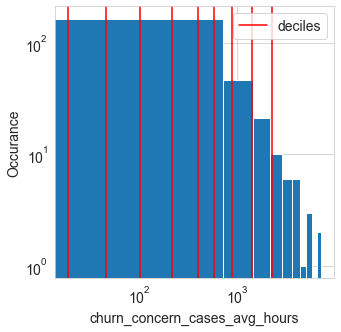

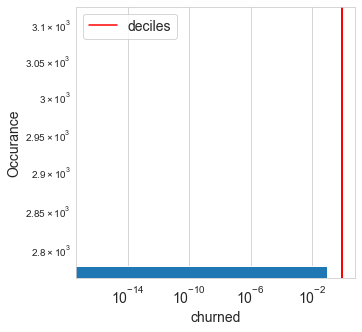

In [122]:
for column in all_num_columns:
    decile_bins(df_raw, column,10)

In [22]:
import numpy as np

np.floor_divide(df_raw['cases_age_hours_total'], 10).head(10), df_raw['cases_age_hours_total'].head(10)

(0      NaN
 1    479.0
 2     17.0
 3    112.0
 4    108.0
 5    566.0
 6    202.0
 7    441.0
 8    164.0
 9    124.0
 Name: cases_age_hours_total, dtype: float64, 0       NaN
 1    4795.0
 2     170.0
 3    1127.0
 4    1083.0
 5    5667.0
 6    2023.0
 7    4419.0
 8    1640.0
 9    1246.0
 Name: cases_age_hours_total, dtype: float64)